In [16]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)

In [10]:
BITS_12 = 2**12
N_BINS = 512

dfs_SiPM58_BG = []
dfs_SiPM58_BG.append(pd.read_csv('../data/260209/1_SiPM_ChannelsTest_Ch5-8_Ch2_CT_Thr1_cmisvoffset127_Background.csv'))
dfs_SiPM58_BG.append(pd.read_csv('../data/260209/2_SiPM_ChannelsTest_Ch5-8_Ch6_CT_Thr1_cmisvoffset127_Background.csv'))
dfs_SiPM58_BG.append(pd.read_csv('../data/260209/3_SiPM_ChannelsTest_Ch5-8_Ch10_CT_Thr1_cmisvoffset127_Background.csv'))
dfs_SiPM58_BG.append(pd.read_csv('../data/260209/4_SiPM_ChannelsTest_Ch5-8_Ch14_CT_Thr1_cmisvoffset127_Background.csv'))
times_SiPM58_BG = [119.634, 161.062, 148.920, 164.828]

dfs_SiPM14_BG = []
dfs_SiPM14_BG.append(pd.read_csv('../data/260209/5_SiPM_ChannelsTest_Ch1-4_Ch2_CT_Trh1_cmisvoffset127_Background.csv'))
dfs_SiPM14_BG.append(pd.read_csv('../data/260209/2_SiPM_ChannelsTest_Ch5-8_Ch6_CT_Thr1_cmisvoffset127_Background.csv'))
dfs_SiPM14_BG.append(pd.read_csv('../data/260209/3_SiPM_ChannelsTest_Ch5-8_Ch10_CT_Thr1_cmisvoffset127_Background.csv'))
dfs_SiPM14_BG.append(pd.read_csv('../data/260209/4_SiPM_ChannelsTest_Ch5-8_Ch14_CT_Thr1_cmisvoffset127_Background.csv'))
times_SiPM14_BG = [34.836, 80.792, 54.386, 90.837]

dfs_SiPM14_Cs137 = []
dfs_SiPM14_Cs137.append(pd.read_csv('../data/260209/12_SiPM_ChannelsTest_Ch1-4_Ch2_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM14_Cs137.append(pd.read_csv('../data/260209/11_SiPM_ChannelsTest_Ch1-4_Ch6_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM14_Cs137.append(pd.read_csv('../data/260209/10_SiPM_ChannelsTest_Ch1-4_Ch10_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM14_Cs137.append(pd.read_csv('../data/260209/9_SiPM_ChannelsTest_Ch1-4_Ch14_CT_Thr1_cmisvoffset127_Cs137.csv'))
times_SiPM14_Cs137 = [23.381, 24.606, 24.144, 24.645]

dfs_SiPM58_Cs137 = []
dfs_SiPM58_Cs137.append(pd.read_csv('../data/260209/13_SiPM_ChannelsTest_Ch5-8_Ch2_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM58_Cs137.append(pd.read_csv('../data/260209/14_SiPM_ChannelsTest_Ch5-8_Ch6_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM58_Cs137.append(pd.read_csv('../data/260209/15_SiPM_ChannelsTest_Ch5-8_Ch10_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM58_Cs137.append(pd.read_csv('../data/260209/16_SiPM_ChannelsTest_Ch5-8_Ch14_CT_Thr1_cmisvoffset127_Cs137.csv'))
times_SiPM58_Cs137 = [24.720, 24.916, 24.848, 24.934]

SIPHRA_Ch_list = ['Ch2', 'Ch6', 'Ch10', 'Ch14']
dfs = [dfs_SiPM14_BG, dfs_SiPM14_Cs137, dfs_SiPM58_BG, dfs_SiPM58_Cs137]
data_SiPM_chs = ['1-4', '1-4', '5-8', '5-8']
legend = ['Ch.2', 'Ch.6', 'Ch.10', 'Ch.14']


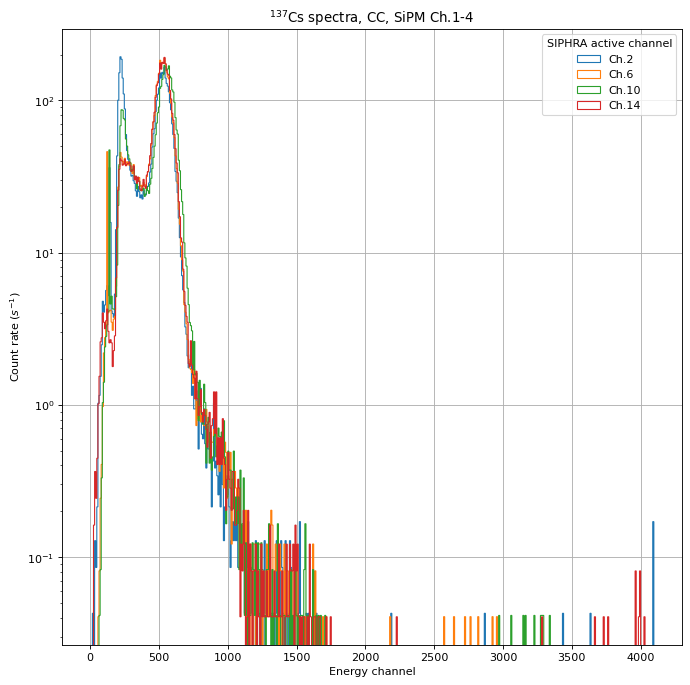

In [14]:
import numpy as np

plt.figure(figsize=(10,10), dpi=80)
for idx,(data, ch) in enumerate(zip(dfs_SiPM14_Cs137, SIPHRA_Ch_list)):
    plt.hist(data[ch], N_BINS, range=(0,BITS_12), weights=(1/times_SiPM14_Cs137[idx])*np.ones_like(data[ch]), log=True, histtype='step', label=legend[idx])
plt.legend(title="SIPHRA active channel")
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title(r'$^{137}$Cs spectra, CC, SiPM Ch.1-4')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()

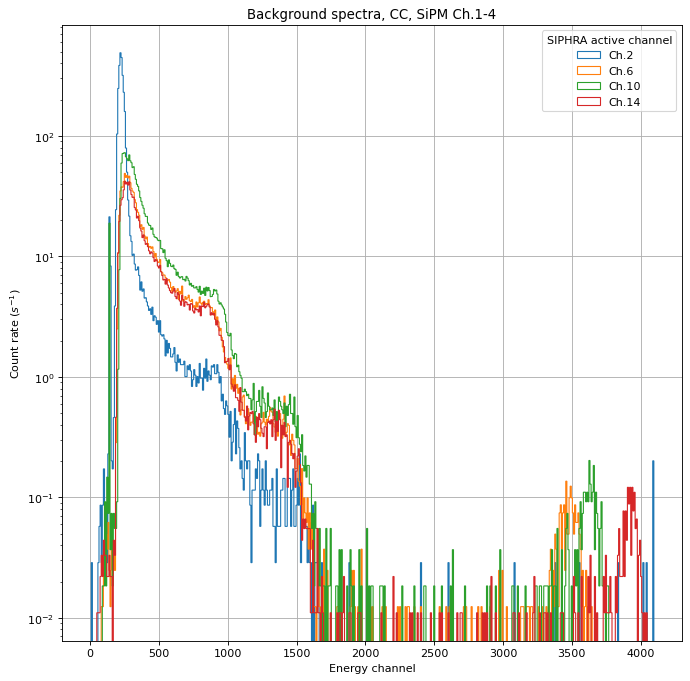

In [15]:
plt.figure(figsize=(10,10), dpi=80)
for idx,(data, ch) in enumerate(zip(dfs_SiPM14_BG, SIPHRA_Ch_list)):
    plt.hist(data[ch], N_BINS, range=(0,BITS_12), weights=(1/times_SiPM14_BG[idx])*np.ones_like(data[ch]), log=True, histtype='step', label=legend[idx])
plt.legend(title="SIPHRA active channel")
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('Background spectra, CC, SiPM Ch.1-4')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()

In [26]:
H_bg, bins_bg = np.histogram(dfs_SiPM14_BG[0]['Ch2'], bins=N_BINS, range=(0,BITS_12))
H_cs, bins_cs = np.histogram(dfs_SiPM14_Cs137[0]['Ch2'], bins=N_BINS, range=(0,BITS_12))
H_cs_subt = (H_cs/times_SiPM14_Cs137[0] - H_bg/times_SiPM14_BG[0]).clip(min=0)

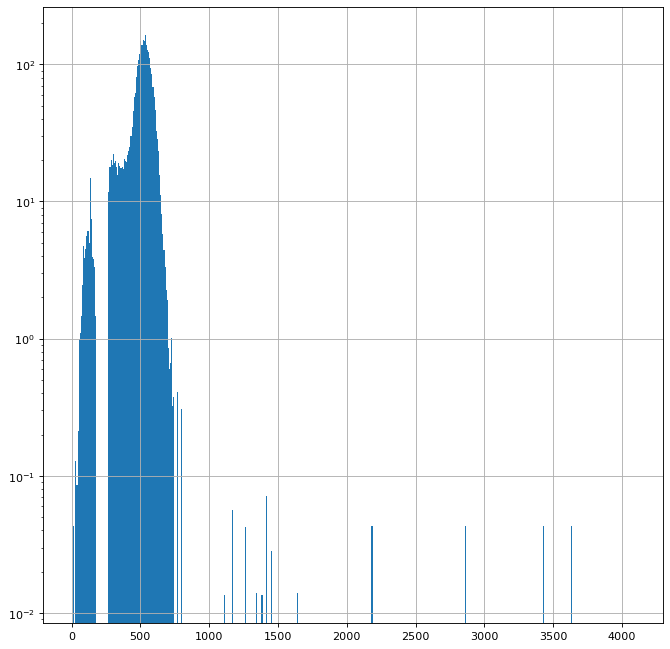

In [35]:
plt.figure(figsize=(10,10), dpi=80)
plt.bar(bins_cs[:-1], H_cs_subt, width=BITS_12/N_BINS, log=True)
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()